In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [10]:
data = np.load('data.npy')
target = np.load('target.npy')
print('data shape:', data.shape)
print('target shape:', target.shape)

data shape: (1376, 100, 100, 1)
target shape: (1376, 2)


In [11]:
model = Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200, (3, 3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.4))

#Dense layer of 50 neurons
model.add(Dense(60, activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data ,train_target ,test_target = train_test_split(data, target, test_size = 0.1)

print('train_data:', train_data.shape)
print('train_target:', train_data.shape)
print('test_data:', train_data.shape)
print('test_target:', train_data.shape)

train_data: (1238, 100, 100, 1)
train_target: (1238, 100, 100, 1)
test_data: (1238, 100, 100, 1)
test_target: (1238, 100, 100, 1)


In [13]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
history = model.fit(train_data, train_target, epochs = 20, callbacks = [checkpoint], validation_split = 0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.8086 - accuracy: 0.5515
Epoch 00001: val_loss improved from inf to 0.59735, saving model to model-001.model
INFO:tensorflow:Assets written to: model-001.model\assets
31/31 [==============================] - 46s 1s/step - loss: 0.8086 - accuracy: 0.5515 - val_loss: 0.5974 - val_accuracy: 0.7621
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.7404
Epoch 00002: val_loss improved from 0.59735 to 0.46671, saving model to model-002.model
INFO:tensorflow:Assets written to: model-002.model\assets
31/31 [==============================] - 49s 2s/step - loss: 0.5207 - accuracy: 0.7404 - val_loss: 0.4667 - val_accuracy: 0.7702
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8505
Epoch 00003: val_loss improved from 0.46671 to 0.35405, saving model to model-003.model
INFO:tensorflow:Assets written to: model-003.model\assets
31/31 [===================

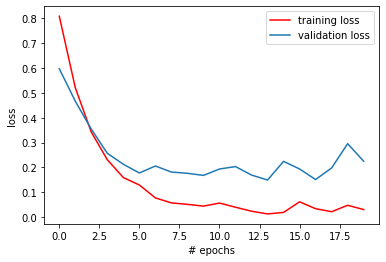

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

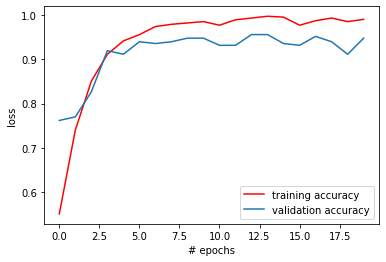

In [15]:
plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 515ms/step - loss: 0.2157 - accuracy: 0.9565
[0.21568264067173004, 0.95652174949646]


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            